**1. Import Necessary Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**2. To read the data into Python.**

In [11]:
college = pd.read_csv('error_free_college_data.csv')
print(college.head())

                        College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     yes  1660    1232     721         23   
1            Adelphi University     yes  2186    1924     512         16   
2                Adrian College     yes  1428    1097     336         22   
3           Agnes Scott College     yes   417     349     137         60   
4     Alaska Pacific University     yes   193     146      55         16   

   Top25perc  Fundergrad  Pundergrad  Outstate  RoomBoard  Books  Personal  \
0         52        2885         537      7440       3300    450      2200   
1         29        2683        1227     12280       6450    750      1500   
2         50        1036          99     11250       3750    400      1165   
3         89         510          63     12960       5450    450       875   
4         44         249         869      7560       4120    800      1500   

   PhD  Terminal  SFRatio  percalumni  Expend  GradRate  
0   70        78

In [12]:
numerical_cols = college.select_dtypes(include=np.number).columns

**3. Univariate Analysis: Analysis on numerical Variables**

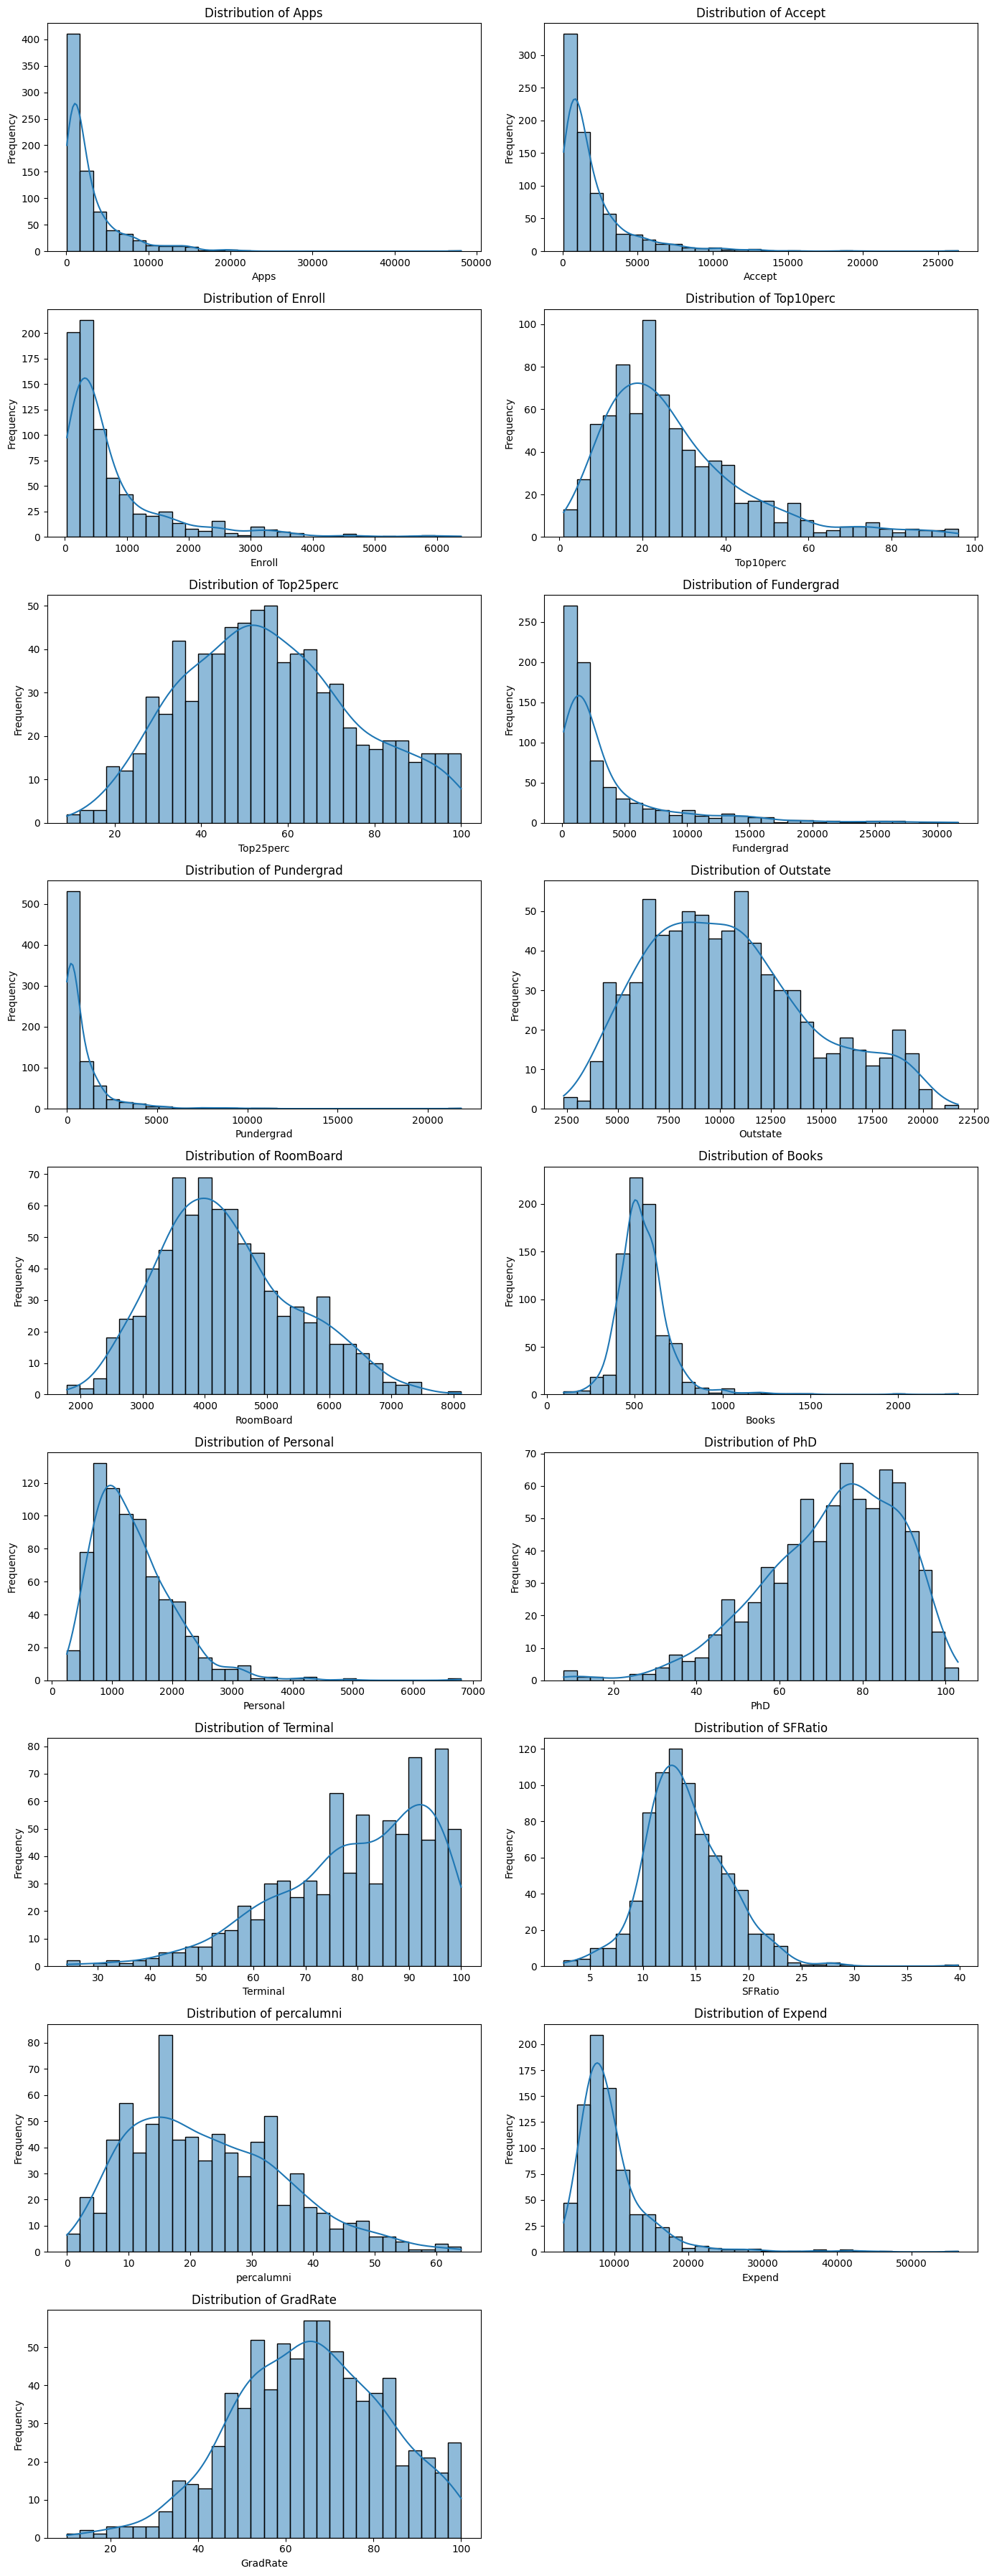

In [13]:
i=0
nrows = math.ceil(len(numerical_cols)/2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.histplot(college[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

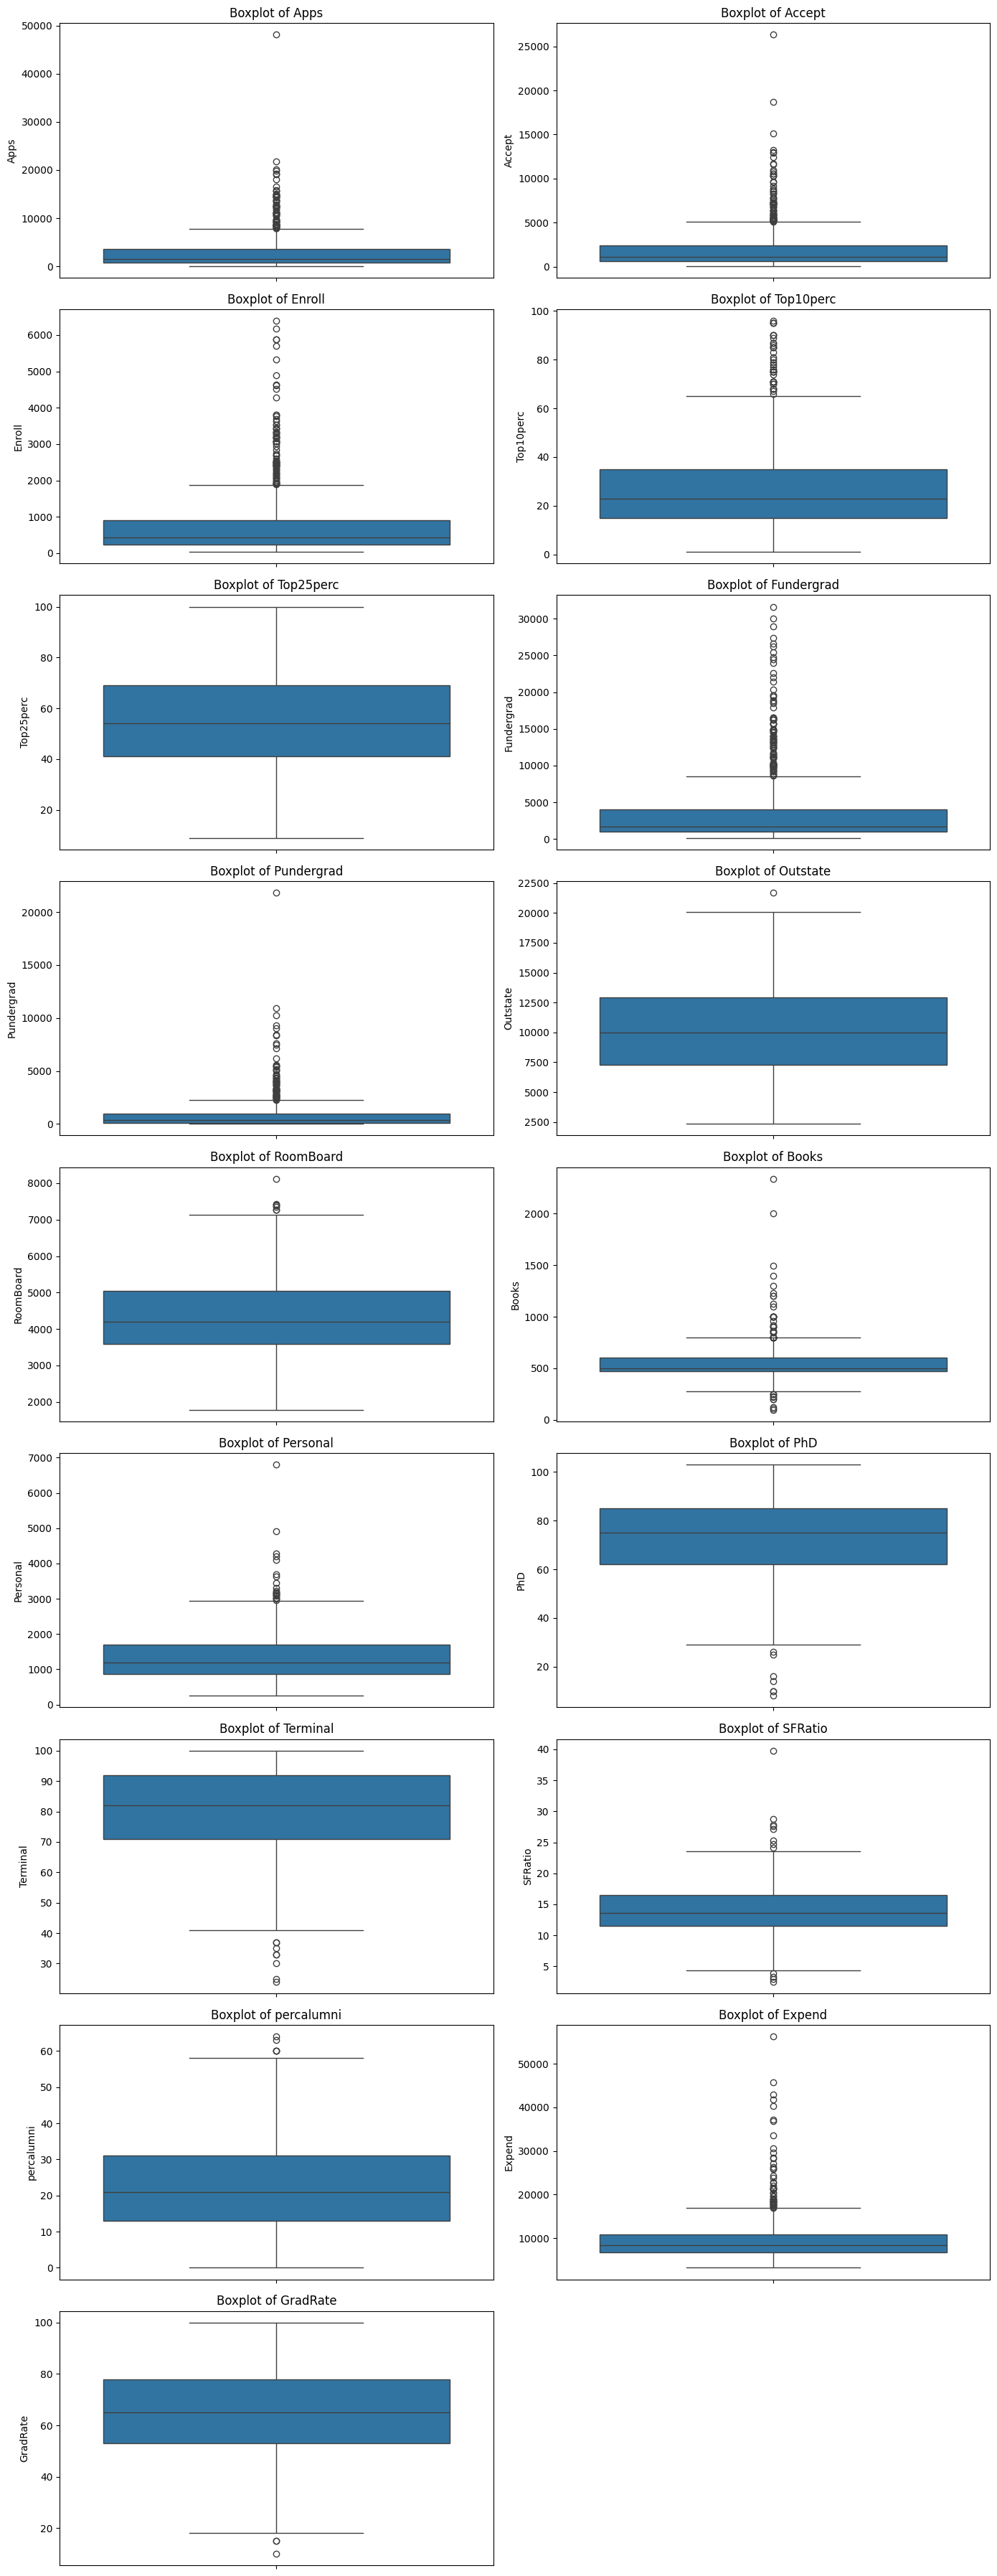

In [14]:
nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=college[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Conclusion of Step 3**

Beyond initial statistical checks, detailed univariate analysis using histogram and boxplots revealed the presence of additional, significant outliers in several key numerical attributes.

We conclude that the `Apps`, `Accept`, `Enroll`, `Top10perc`, `Fundergrad`, `Pundergrad`, `RoomBoard`, `Personal`, `percalumni`, and `Expend` attribute has **potential outliers & right-skewed / positive skewness**. The reasons are
* In histogram, most of the data points are concentrated on the left end, with a few values pulling the mean to the right.
* In box plot,
    - The median line is even little closer to the bottom of the box.
    - The space of the upper whisker is longer than the lower whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers.

We conclude that the `Phd`, and `Terminal` attribute has **potential outliers & right-skewed / negative skewness**. The reasons are
* In histogram, most of the data points are concentrated on the right end, with a few values pulling the mean to the left.
* In box plot,
    - The median line is even little closer to the top of the box.
    - The space of the lower whisker is longer than the upper whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers.

We conclude that the `Books`, and `SFRatio` attribute has **potential outliers**. The reasons are
* In histogram, most of the data points are concentrated on the right end, with a few values pulling the mean to the lef.
* In box plot,
    - The median line is even little closer to the bottom of the box.
    - The space of the upper whisker is longer than the lower whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers.

These points, largely representing plausible but exceptionally high or low characteristics of certain institutions, suggest that careful consideration of data transformation (e.g., log scaling) will be essential during preprocessing to manage their potential impact on machine learning model performance and to normalize feature distributions.

Plausible Extreme Value in `Outstate` Tuition:
* While the `Outstate` tuition boxplot clearly shows a distinct outlier (and its histogram exhibits a slight right-skewness due to it), this extreme value is interpreted as a legitimate data point representing a highly expensive institution, rather than a data error.
* Its presence highlights the significant range in tuition costs among the colleges.
* This observation suggests that
    * For linear-based ML models, data transformation (e.g., a log transformation) may be beneficial for this variable during the preprocessing phase.
    * For Tree-based models, compare between data transformed and original data.
* This would mitigate its disproportionate influence on certain machine learning models, ensuring the model's robustness for the majority of institutions.

The attribute `GradRate` has 2 points below the `GradRate` suggests presence of outliers.

The attribute `Top25perc` has no outliers which is concluded by no bubbles in the boxplot and distribution of data is symmetrical in histogram plot.

**4. Univariate Analysis: Analysis on Categorical Variables `Private`**

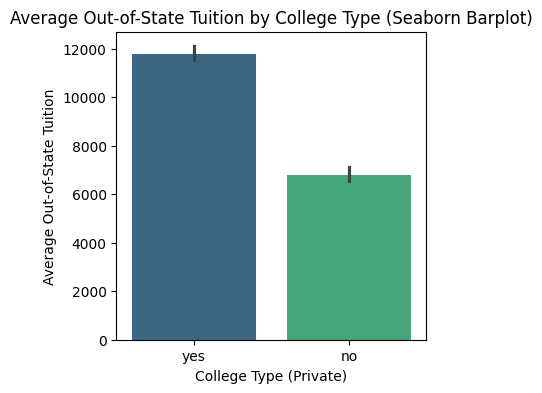

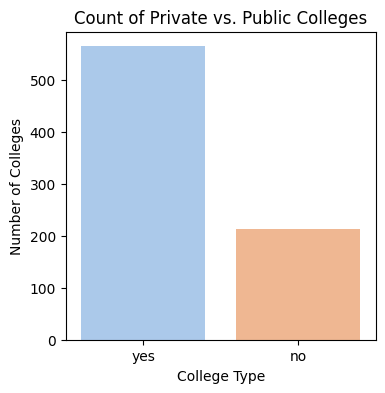

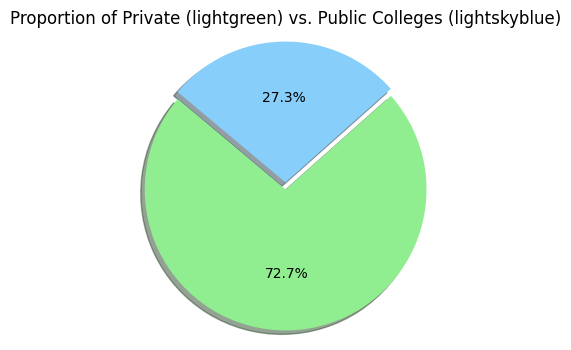

In [15]:
# --- 1. Bar Chart ---
plt.figure(figsize=(4, 4))
sns.barplot(x='Private', y='Outstate', data=college, palette='viridis', legend=False, hue='Private')
plt.title('Average Out-of-State Tuition by College Type (Seaborn Barplot)')
plt.xlabel('College Type (Private)')
plt.ylabel('Average Out-of-State Tuition')
plt.show()


# --- 2. Count Plot ---
plt.figure(figsize=(4, 4))
sns.countplot(x='Private', data=college, palette='pastel', hue='Private', legend=False)
plt.title('Count of Private vs. Public Colleges')
plt.xlabel('College Type')
plt.ylabel('Number of Colleges')
plt.show()


# --- 3. Pie Chart ---
private_counts = college['Private'].value_counts()
labels = private_counts.index
sizes = private_counts.values
colors = ['lightgreen', 'lightskyblue']
explode = (0.05, 0)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Private (lightgreen) vs. Public Colleges (lightskyblue)')
plt.axis('equal')
plt.show()

**Conclusion of Step 4**

We have `private` categorical column which says
- There are significantly more private colleges (72.7%) than public colleges (27.3%) in this dataset.
- Private colleges, on average, have much higher out-of-state tuition than public colleges.
- The dataset is imbalanced, with a higher proportion of private institutions. This is crucial to build a classification model to predict 'Private' status, as imbalanced data can affect model performance.
- These charts can be used for presentation of data based on the requirement for the future use.

**5. Explore Relationship between variables: Correlation Coefficient Heatmap**

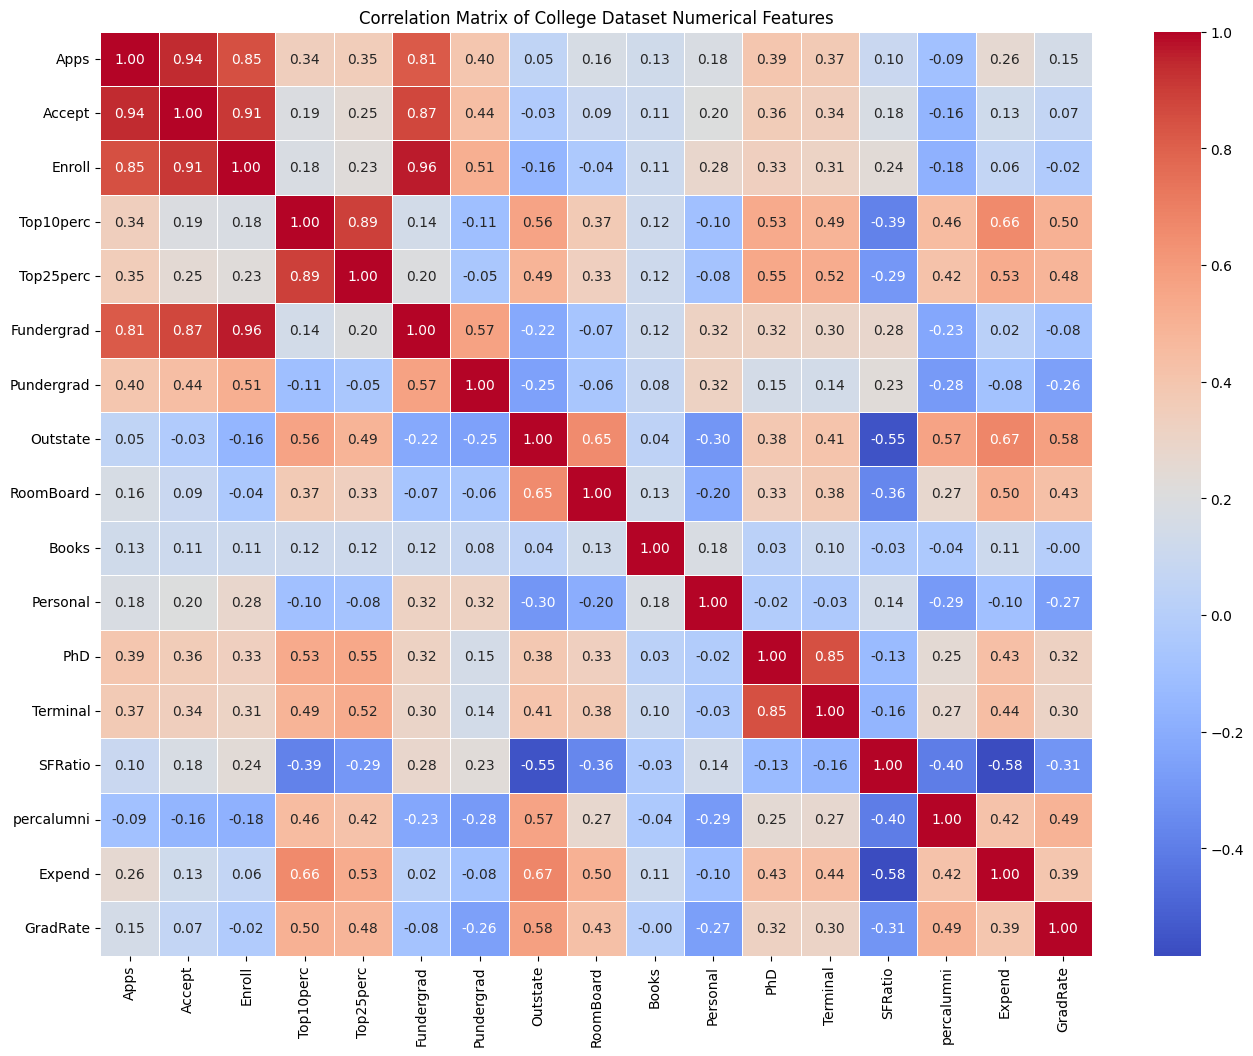

In [16]:
# Calculate the correlation matrix
correlation_matrix = college[numerical_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of College Dataset Numerical Features')
plt.show()

**Conclusion of Step 5**

So, From the above correlation coefficient Heatmap, we can infer that,
* As attribute `Apps` increases `Accept` also increases => Which means, colleges receiving more applications tend to accept a greater number of students.
* Similarly,
    - `Accept` increases -> `Enroll` will also increase
    - `Apps`, or `Accept` or 'Enroll` increases -> `F.Undergrad` will also increase => No. of Full-time Undergraduates increases because they are enrolling more. larger institutions, characterized by higher application and acceptance volumes, generally have a greater number of full-time undergraduate students
    - `PhD` increases -> `Terminal` increases -> Faculties with Terminal degree are growing as lot of students studies PhD increases.
    - `S.F.Ratio` decreases -> `Expend` increases -> As the student-to-faculty ratio decreases (meaning more faculty per student, or smaller class sizes), the instructional expenditure per student tends to increase.

**6. Bivariate Analysis: Numerical Vs Numerical (with hue='Private')**


--- Bivariate Analysis: Numerical vs. Numerical (with hue='Private') ---


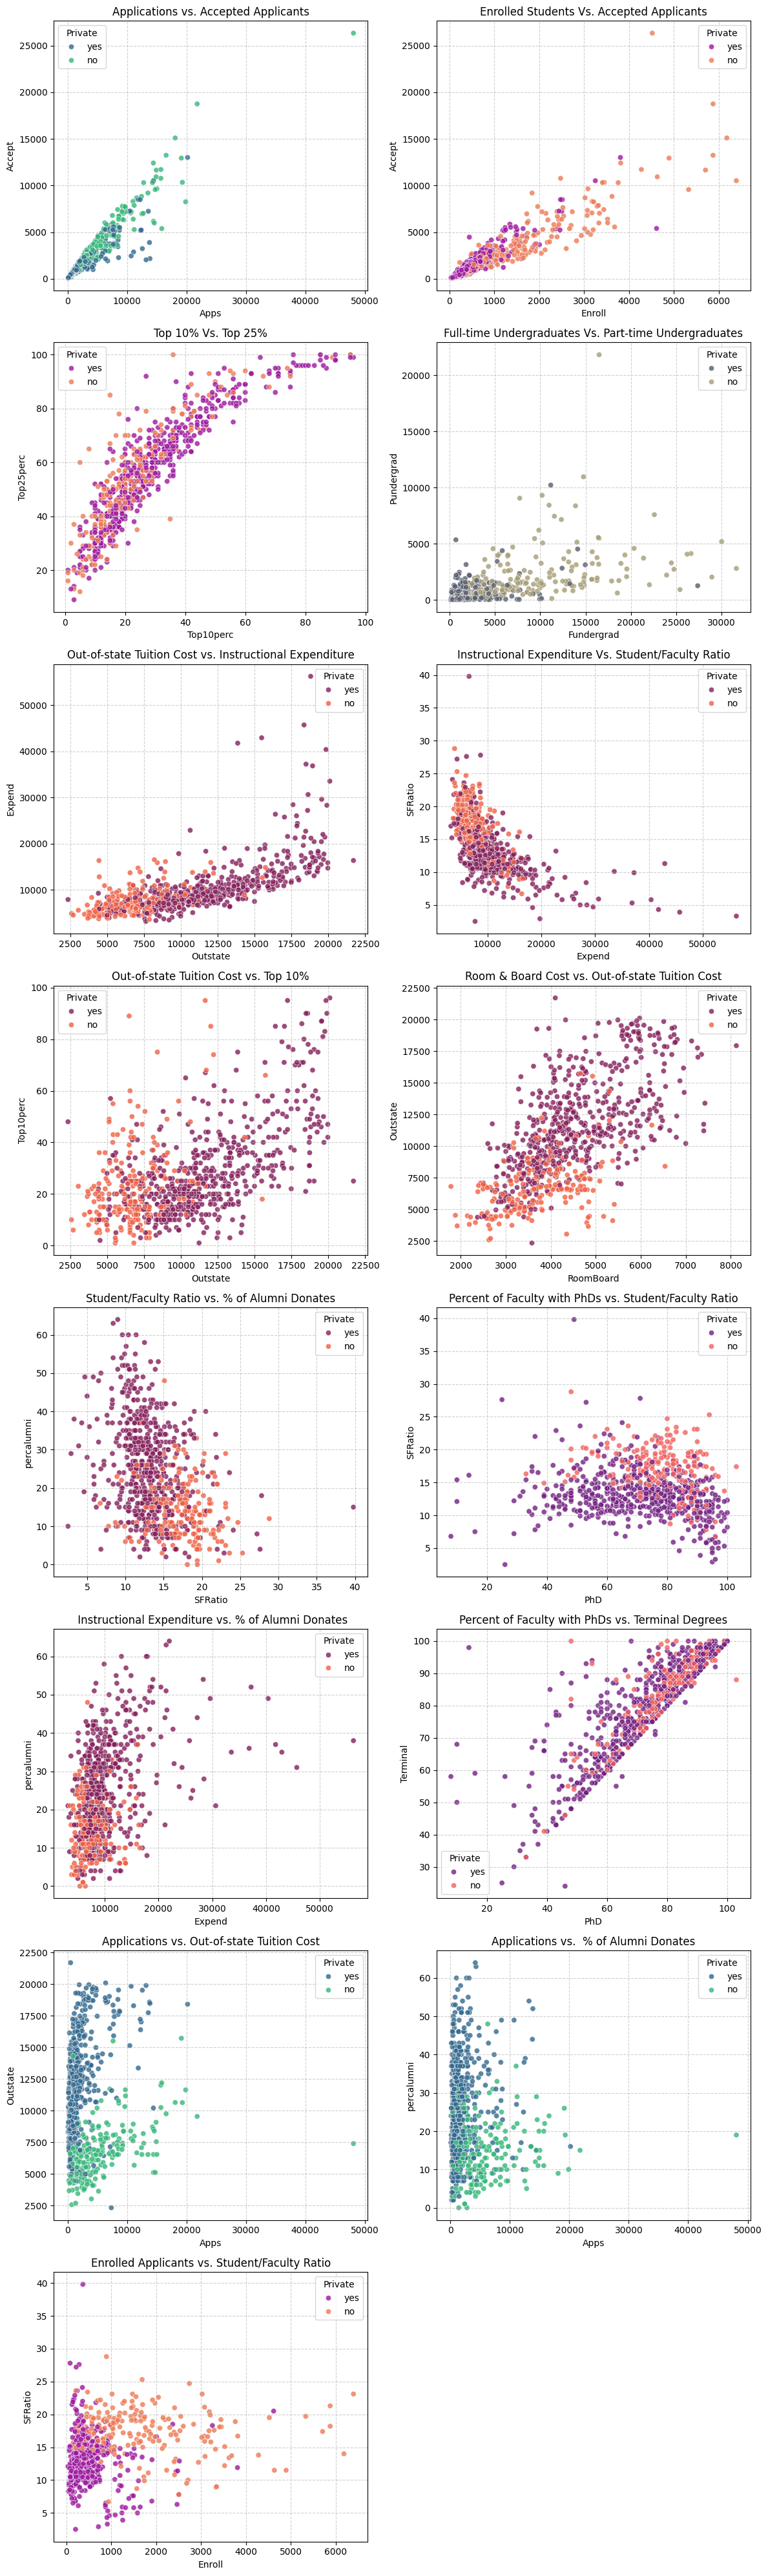

In [17]:
print("\n--- Bivariate Analysis: Numerical vs. Numerical (with hue='Private') ---")

plots_to_generate = [
    ('Apps', 'Accept', 'Applications vs. Accepted Applicants', 'viridis'),
    ('Enroll', 'Accept', 'Enrolled Students Vs. Accepted Applicants', 'plasma'),
    ('Top10perc', 'Top25perc', 'Top 10% Vs. Top 25%', 'plasma'),
    ('Fundergrad', 'Pundergrad', 'Full-time Undergraduates Vs. Part-time Undergraduates', 'cividis'),
    ('Outstate', 'Expend', 'Out-of-state Tuition Cost vs. Instructional Expenditure', 'rocket'),
    ('Expend', 'SFRatio', 'Instructional Expenditure Vs. Student/Faculty Ratio', 'rocket'),
    ('Outstate', 'Top10perc', 'Out-of-state Tuition Cost vs. Top 10%', 'rocket'),
    ('RoomBoard', 'Outstate', 'Room & Board Cost vs. Out-of-state Tuition Cost', 'rocket'),
    ('SFRatio', 'percalumni', 'Student/Faculty Ratio vs. % of Alumni Donates', 'rocket'),
    ('PhD', 'SFRatio', 'Percent of Faculty with PhDs vs. Student/Faculty Ratio', 'magma'),
    ('Expend', 'percalumni', ' Instructional Expenditure vs. % of Alumni Donates', 'rocket'),
    ('PhD', 'Terminal', 'Percent of Faculty with PhDs vs. Terminal Degrees', 'magma'),
    ('Apps', 'Outstate', 'Applications vs. Out-of-state Tuition Cost', 'viridis'),
    ('Apps', 'percalumni', 'Applications vs.  % of Alumni Donates', 'viridis'),
    ('Enroll', 'SFRatio', 'Enrolled Applicants vs. Student/Faculty Ratio', 'plasma'),
]

num_plots = len(plots_to_generate)
nrows = math.ceil(num_plots / 2)
plt.figure(figsize=(12, nrows * 5))

for i, (x_col, y_col, title, palette) in enumerate(plots_to_generate):
    plt.subplot(nrows, 2, i + 1)
    sns.scatterplot(x=x_col, y=y_col, data=college, hue='Private', palette=palette, alpha=0.8)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Conclusion of 6:**

1. **Applications vs. Accepted Applicants**
    - *Relationship*: Strong positive Linear Relationship.
    - *Insight*: As no. of students applied increases, the no. of students accepted increases. The spread around the line shows that some colleges are more selective than others.
    - *For Prediction Model*: Do not include both => both do not contribute to the prediction.

2. **Enrolled Students Vs. Accepted Applicants**
    - *Relationship*: Strong positive linear relationship.
    - *Insight*: As no. of Students Accepted increases, no. of students enrolled increases.
    - *For Prediction Model*: multicollinearity => Feature Engineering: `Yield Rate` (`Enrolled Students` / `Accepted Applicants`)

3. **Top 10% Vs. Top 25%**
    - *Relationship*: Very Strong positive linear relationship.
    - *Insight*: Top 10% is a subset of Top 25% => so it is expected.
    - A college that attracts a high percentage of students in the top 10% of their high school class is likely a more competitive, more academically demanding institution.
    - *For Prediction Model*: use `Top10%` => multicollinearity => `Top10%` might be a slightly better choice as it's a more specific measure of student quality.

4. **Full-time Undergraduates Vs. Part-time Undergraduates**
    - *Relationship*: Very weak positive linear relationship.
    - *Insight*: This indicates that colleges vary significantly in their student body composition.
    - Full-time students are more access to resources. A college with a higher percentage of part-time undergraduates may, on average, have a lower graduation rate.
    - *For Prediction Model*: use `Fundergrad` & `Pundergrad`.

5. **Out-of-state tuition Cost vs. Instructional Expenditure**
    - *Relationship*: positive linear relationship.
    - *Insight*: Colleges with higher out-of-state tuition have higher instructional expenditures per student, but not perfectly.
    - *For Prediction Model*: No new decisions => Both can be used but plot 6 includes transformed expend and plot 8 includes total cost.

6. **Instructional Expenditure Vs. Student/Faculty Ratio**
    - *Relationship*: Weak negative non-linear relationship. The trend is downward, but the points are very dispersed, especially at higher expenditures.
    - *Insight*: Colleges with higher instructional expenditures tend to have a slightly better (lower) student-to-faculty ratio.
    - *For Prediction Model*: non-linear trend => simple linear model cannot fully capture the relationship. => Consider a non-linear model / feature transformation for `Expend` & `SFRatio`.

7. **Out-of-state tuition Cost vs. Top 10%**
    - *Relationship*: No relationship => Data points are scattered.
    - *Insight*: Colleges with higher tuition do not have a higher percentage of top-performing students.
    - *For Prediction Model*: no new decisions => plot 3 says to use Top10% and plot 8 says out-of-state tuition cost is part of total cost and plot 7 is weak to change earlier decision

8. **Room & Board Cost vs. Out-of-state tuition Cost**
    - *Relationship*: Positive linear relationship => Data points are scattered but moving in upward direction, from the bottom-left to the top-right.
    - *Insight*: If the college is expensive in Room & Board, then the out-of-state tuition is also expensive and maybe vice-versa.
    - *For Prediction Model*: multicollinearity => try both and use only one or feature engineer: 'Total Cost' and look at the results of both.
    - Possible Relationships:
        - Positive: Higher cost can be a proxy for higher quality (better facilities, more resources). Students who pay more might also be more motivated to graduate to get a return on their investment.
        - Negative: Higher cost could lead to increased financial strain, forcing students to drop out or take time off, which would lower the graduation rate.
        - Plotting `Total Cost` against Graduation Rate will be a critical step.

9. **Student/Faculty Ratio vs. % of Alumni Donates**
    - *Relationship*: no relationship. Data points are scattered.
    - *Insight*: A lower SF ratio do attract lot of alumni to donate. Its depends.
    - A high percentage of alumni who donate is a strong indicator of alumni satisfaction. The donations themselves provide the college with more resources.
    - *For Prediction Model*: use `% of Alumni Donates`. => plot 6 says transformed SF ratio will be used & plot 9 says % of alumni donates is not redundant with SF ratio.

10. **Percent of Faculty with PhDs vs. Student/Faculty Ratio**
    - *Relationship*: Weak negative linear relationship
    - *Insight*: Here, colleges with more faculty with Ph.D.s do to tend have a better (lower) student-to-faculty ratio.
    - *For Prediction Model*: No new decisions => plot 12 says faculty with phds have multicollinearity with terminal degrees nd plot 6 includes transformed SF ratio. These two  are not redundant to alter the earlier decision.

11. **Instructional Expenditure vs. % of Alumni Donates**
    - *Relationship*: positive linear relationship.
    - *Insight*: Colleges that spend more per student also tend to have a higher percentage of alumni who donate. This suggest the institutional investment & alumni satisfaction.
    - Also from plot 9, we can say that Expend per student increases alumni satisfaction but SF ratio doesn't. so the expend on increasing faculties doesn't increases alumni satisfaction.
    - *For Prediction Model*: No new decisions => plot 6 says transformed Expend will be used & plot 9 says can use percalumni. Plot 11 says these both do have linear relationship but not strong so using both is fine.

12. **Percent of Faculty with PhDs vs. Terminal Degrees**
    - *Relationship*: Extremely strong positive linear relationship.
    - *Insight*: A Ph.D. is a type of terminal degree. So expected.
    - *For Prediction Model*: use `Terminal Degrees` => multicollinearity => Select only one.

13. **Applications vs. Out-of-state Tuition Cost**
    - *Relationship*: weak positive non-linear relationship.
    - *Insight*: colleges with higher tuition not much tend to receive fewer applications.
    - *For Prediction Model*: No new decisions => Plot 1 says applications need not be used and plot 8 says out-of-state tuition cost will be part of total cost.

14. **Applications vs.  % of Alumni Donates**
    - *Relationship*: very weak positive non-linear relationship.
    - *Insight*: while a college with a high alumni donations might receive a lot of applications, many colleges with similar donation rates have very different no. of applications.
    - *For Prediction Model*: No new decisions => As said in plot 1, applications need not be used. As said in plot 9, percalumni can be used.

15. **Enrolled Applicants vs. Student/Faculty Ratio**
    - *Relationship*: Weak negative non-linear relationship.
    - *Insight*:  As the number of enrolled applicants increases, the Student/Faculty Ratio value also slightly increases.
    - *For Prediction Model*: No new decisions => They don't correlate enough to cause redundancy, so can use both. Also enrolled applicants will be converted to yield rate and SF ratio will be transformed as said in plot 2 and plot 6 respectively.

-----
**Final Decisions & Next steps:**

-----
- Handling Outliers:
    [`Apps`, `Accept`, `Enroll`, `Top10perc`, `Fundergrad`, `Pundergrad`, `RoomBoard`, `Personal`, `percalumni`, `Expend`, `Phd`, `Terminal`, `Books`, `SFRatio`]
- Feature Engineering:
    - college['TotalCost'] = college['RoomBoard'] + college['Outstate']
    - college['YieldRate'] = college['Enroll'] / college['Accept']
- Feature Transformation:
    - SFratio & Expend
    - Outstate
- Features To be included for training for now:
    ['Private', 'YieldRate', 'Top10%', 'Fundergrad', 'Pundergrad', 'TransformedSFRatio', 'TransformedExpend', 'percalumni', 'TerminalDegrees']